# Aplicando Python para análisis de precios: simulación de escenarios futuros de precios

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

> En la clase anterior vimos como importar datos de activos de la base de datos de Yahoo Finance usando el paquete pandas-datareader. En esta clase, veremos como pronosticar escenarios de evolución de precios, suponiendo que los rendimientos diarios se distribuyen normalmente. Como esta evolución de precios es aleatoria, utilizaremos la simulación montecarlo (hacer muchas simulaciones de escenarios de evolución de precios) para obtener probabilidades de que los precios de cierre estén encima de un valor umbral y tomar decisiones con base en estas probabilidades.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

## 1. Recordemos como descargar datos...

Antes que nada, para poder hacer simular escenarios de predicción de precios, vamos a recordar lo que hicimos en la clase pasada de descargar los datos de Yahoo Finance, utilizando el paquete `data` de la librería `pandas_datareader`.

Esta vez, utilizaremos los datos de precios de cierre ajustados de activos de la compañía Apple en el año 2016 para nuestra aplicación.

In [1]:
# Importamos librerías
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
web.DataReader?

In [5]:
# Función para descargar precios de cierre de varios activos a la vez:
def get_closes(names,start,end):
    return web.DataReader(names,'yahoo',start,end)['Close']

In [7]:
# Descargamos datos...
name='AMZN'
start='2015-01-01'
end='2017-12-31'

closes=get_closes(name,start,end)
closes

Date
2015-01-02     308.519989
2015-01-05     302.190002
2015-01-06     295.290009
2015-01-07     298.420013
2015-01-08     300.459991
2015-01-09     296.929993
2015-01-12     291.410004
2015-01-13     294.739990
2015-01-14     293.269989
2015-01-15     286.950012
2015-01-16     290.739990
2015-01-20     289.440002
2015-01-21     297.250000
2015-01-22     310.320007
2015-01-23     312.390015
2015-01-26     309.660004
2015-01-27     306.750000
2015-01-28     303.910004
2015-01-29     311.779999
2015-01-30     354.529999
2015-02-02     364.470001
2015-02-03     363.549988
2015-02-04     364.750000
2015-02-05     373.890015
2015-02-06     374.279999
2015-02-09     370.559998
2015-02-10     373.000000
2015-02-11     375.140015
2015-02-12     377.170013
2015-02-13     381.829987
                 ...     
2017-11-16    1137.290039
2017-11-17    1129.880005
2017-11-20    1126.310059
2017-11-21    1139.489990
2017-11-22    1156.160034
2017-11-24    1186.000000
2017-11-27    1195.829956
2017-11

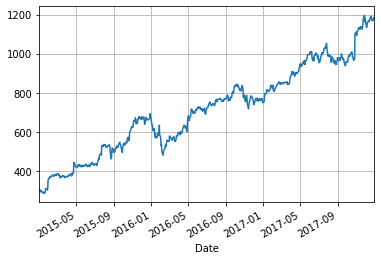

In [8]:
# Graficamos
closes.plot(grid=True)

## 2. Simulación de rendimientos diarios

Recordemos que los precios diarios de cierre no son un proceso estocástico estacionario, pero los rendimientos diarios si lo son. Por tanto calculamos los rendimientos a partir de los precios de cierre, obtenemos sus propiedades estadísticas muestrales y proyectamos los rendimientos. Luego, obtenemos la proyección de los precios.

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el cambio porcentual

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}\approx \ln\left(\frac{S_t}{S_{t-1}}\right)=r_t.
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

Además, supusimos que los rendimientos diarios eran una variable aleatoria con distribución normal (que se caracteriza con su media y varianza). Por tanto obtenemos la media y desviación estandar muestrales. Hagamos una función que retorne lo anterior.

In [9]:
#Rendimiento simple
R=((closes-closes.shift())/closes.shift()).dropna()
R

Date
2015-01-05   -0.020517
2015-01-06   -0.022833
2015-01-07    0.010600
2015-01-08    0.006836
2015-01-09   -0.011749
2015-01-12   -0.018590
2015-01-13    0.011427
2015-01-14   -0.004987
2015-01-15   -0.021550
2015-01-16    0.013208
2015-01-20   -0.004471
2015-01-21    0.026983
2015-01-22    0.043970
2015-01-23    0.006671
2015-01-26   -0.008739
2015-01-27   -0.009397
2015-01-28   -0.009258
2015-01-29    0.025896
2015-01-30    0.137116
2015-02-02    0.028037
2015-02-03   -0.002524
2015-02-04    0.003301
2015-02-05    0.025058
2015-02-06    0.001043
2015-02-09   -0.009939
2015-02-10    0.006585
2015-02-11    0.005737
2015-02-12    0.005411
2015-02-13    0.012355
2015-02-17   -0.016761
                ...   
2017-11-16    0.009408
2017-11-17   -0.006516
2017-11-20   -0.003160
2017-11-21    0.011702
2017-11-22    0.014629
2017-11-24    0.025810
2017-11-27    0.008288
2017-11-28   -0.001865
2017-11-29   -0.027086
2017-11-30    0.013330
2017-12-01   -0.012237
2017-12-04   -0.024433
2017-1

In [10]:
# Rendimiento logarítmico
R=np.log(closes/closes.shift()).dropna()
R

Date
2015-01-05   -0.020731
2015-01-06   -0.023098
2015-01-07    0.010544
2015-01-08    0.006813
2015-01-09   -0.011818
2015-01-12   -0.018765
2015-01-13    0.011362
2015-01-14   -0.005000
2015-01-15   -0.021786
2015-01-16    0.013121
2015-01-20   -0.004481
2015-01-21    0.026626
2015-01-22    0.043031
2015-01-23    0.006648
2015-01-26   -0.008778
2015-01-27   -0.009442
2015-01-28   -0.009301
2015-01-29    0.025566
2015-01-30    0.128495
2015-02-02    0.027651
2015-02-03   -0.002527
2015-02-04    0.003295
2015-02-05    0.024749
2015-02-06    0.001043
2015-02-09   -0.009989
2015-02-10    0.006563
2015-02-11    0.005721
2015-02-12    0.005397
2015-02-13    0.012279
2015-02-17   -0.016903
                ...   
2017-11-16    0.009364
2017-11-17   -0.006537
2017-11-20   -0.003165
2017-11-21    0.011634
2017-11-22    0.014523
2017-11-24    0.025482
2017-11-27    0.008254
2017-11-28   -0.001867
2017-11-29   -0.027460
2017-11-30    0.013242
2017-12-01   -0.012313
2017-12-04   -0.024737
2017-1

Entonces, suponemos que el cambio porcentual de los precios (rendimientos diarios) tiene una distribución normal.

¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

In [12]:
mu,std=R.mean(),R.std()
mu,std

(0.0017672669405832265, 0.01771933414293557)

Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos del 2017, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de cierre de las acciones en el 2018 (hay un supuesto de que las cosas no cambiarán fundamentalmente).

Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones.

Hagamos una una función que simule varios escenarios de rendimientos diarios y que devuelva un dataframe con esta simulación.

In [13]:
np.random.randn?

In [14]:
np.random.normal?

In [15]:
pd.date_range?

In [16]:
#Función para simular N escenarios de rendimientos
def simR(mu,std,start,ndays,N):
    dates=pd.date_range(start,periods=ndays)
    data=np.random.normal(mu,std,(ndays,N))
    return pd.DataFrame(index=dates,data=data)

In [33]:
# Simulamos 100 escenarios para el 2018
datosR=simR(mu,std,'2018-01-01',365,1000)
datosR

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2018-01-01,-0.006281,0.002229,0.024119,-0.006342,-0.020202,-0.048382,0.009695,-0.002104,0.010802,0.003508,...,-0.008970,-0.001510,-0.006853,0.021749,-0.002108,-0.011225,-0.011326,0.002322,0.011987,-0.009399
2018-01-02,0.001004,-0.033505,-0.010896,-0.018201,-0.003249,0.015516,-0.027888,0.003157,0.013657,0.005853,...,0.016849,-0.008359,-0.031503,0.023734,-0.007368,-0.019026,0.005514,0.008921,0.021585,-0.015703
2018-01-03,0.007197,0.012933,0.031928,-0.012482,-0.022663,0.022600,-0.037221,-0.008831,-0.022396,0.013781,...,0.029376,0.014573,-0.008052,-0.028901,-0.012159,0.014071,-0.008528,-0.012034,-0.002834,0.010113
2018-01-04,-0.020630,0.001804,-0.015684,0.004108,0.010284,0.018688,0.019967,0.040255,-0.006502,-0.015029,...,0.001537,-0.006068,0.000417,0.007889,-0.007778,-0.016184,0.021591,-0.037912,-0.036938,0.007995
2018-01-05,-0.015404,-0.017516,-0.011829,0.005844,0.002380,-0.002103,0.003570,0.016065,0.015657,-0.001216,...,0.016868,-0.005608,0.009711,0.020611,0.023104,0.011012,-0.023980,0.002494,-0.004432,-0.023145
2018-01-06,0.013622,-0.030924,-0.004820,0.016151,0.011859,-0.008787,0.002037,-0.007847,-0.014258,-0.014669,...,0.022358,0.009744,0.005889,0.022826,-0.015303,-0.020542,0.006744,0.027154,-0.019267,0.029944
2018-01-07,0.000538,-0.029730,-0.010062,-0.033101,0.028491,-0.014081,0.000650,0.039396,-0.016599,0.020789,...,-0.021688,0.006820,-0.013146,0.003790,0.016583,-0.013819,0.020557,0.010012,0.003172,0.015448
2018-01-08,-0.001194,-0.033086,0.034533,0.013569,0.021685,0.009566,0.015014,0.037344,0.029797,0.023084,...,-0.020094,0.046854,-0.002995,0.003124,0.031395,0.032653,-0.017193,-0.008593,0.015035,0.015427
2018-01-09,-0.011900,-0.008910,-0.001001,-0.007649,-0.009866,-0.019402,0.013794,-0.008170,-0.005154,-0.000654,...,0.011901,0.007427,0.012348,-0.005966,0.006539,0.015956,0.009950,-0.002399,-0.013214,-0.001408
2018-01-10,-0.017188,0.003839,-0.005570,0.026975,0.010322,0.026952,-0.005731,-0.003146,0.007105,0.008403,...,-0.012405,0.000820,0.025538,-0.010674,0.007538,0.018806,0.013175,-0.009266,-0.014674,0.048450


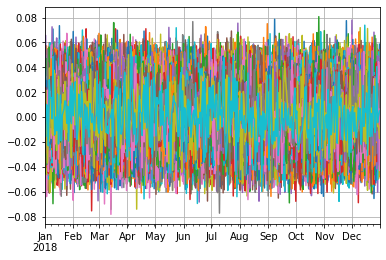

In [34]:
#Gráfica
datosR.plot(grid=True,legend=False)

## 3. Proyección de precios de cierre

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}(R_i+1)\\
p_{i+1}&=p_i(R_{i+1}+1)=p_{i-1}(R_i+1)(R_{i+1}+1)\\
&\vdots\\
p_{i+k}&=p_{i-1}(R_i+1)\cdots(R_{i+k}+1).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}(R_0+1)\cdots(R_{k}+1)$, donde $p_{-1}$ es el último precio reportado en el 2017.

Con los rendimientos, calculamos los precios de cierre...

In [20]:
pd.DataFrame.cumprod?

In [35]:
# Proyección para el 2018

simCloses=closes.iloc[-1]*((1+datosR).cumprod())
simCloses

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2018-01-01,1162.124756,1172.076454,1197.676182,1162.053165,1145.844318,1112.888422,1180.808465,1167.009245,1182.102769,1173.572348,...,1158.980278,1167.704020,1161.456024,1194.904917,1167.005225,1156.342296,1156.224596,1172.184970,1183.488629,1158.478477
2018-01-02,1163.291727,1132.805462,1184.626756,1140.903126,1142.120965,1130.155672,1147.877535,1170.693261,1198.246685,1180.441244,...,1178.508094,1157.943367,1124.866704,1223.264810,1158.406609,1134.341884,1162.599967,1182.641559,1209.033720,1140.287078
2018-01-03,1171.663930,1147.455611,1222.449242,1126.662550,1116.237270,1155.697151,1105.152414,1160.354519,1171.410798,1196.708606,...,1213.127438,1174.818032,1115.809813,1187.911291,1144.322059,1150.302724,1152.685445,1168.409550,1205.607103,1151.818677
2018-01-04,1147.492897,1149.526119,1203.275869,1131.290560,1127.716386,1177.295102,1127.218703,1207.064054,1163.794606,1178.723226,...,1214.991652,1167.689343,1116.274792,1197.282831,1135.421788,1131.685674,1177.573570,1124.113244,1161.073968,1161.026918
2018-01-05,1129.816432,1129.391394,1189.042421,1137.901267,1130.400910,1174.819600,1131.243372,1226.455385,1182.016677,1177.289563,...,1235.485589,1161.141262,1127.115185,1221.960008,1161.654094,1144.147346,1149.335884,1126.917166,1155.928047,1134.154955
2018-01-06,1145.206523,1094.465694,1183.311551,1156.279011,1143.806890,1164.496971,1133.548117,1216.831067,1165.163287,1160.019758,...,1263.109149,1172.455190,1133.753138,1249.852137,1143.877787,1120.643880,1157.086590,1157.517658,1133.656378,1168.115977
2018-01-07,1145.822224,1061.927621,1171.405538,1118.005290,1176.395078,1148.099170,1134.285146,1264.769241,1145.822829,1184.134864,...,1235.714707,1180.451028,1118.848544,1254.589011,1162.846239,1105.157854,1180.873084,1169.106496,1137.252285,1186.161406
2018-01-08,1144.453886,1026.792623,1211.857627,1133.175039,1201.905689,1159.082173,1151.314799,1312.001065,1179.964420,1211.469345,...,1210.884851,1235.760335,1115.497189,1258.508430,1199.353589,1141.244670,1160.570141,1159.060733,1154.350737,1204.460406
2018-01-09,1130.834667,1017.644065,1210.644772,1124.507401,1190.047564,1136.593183,1167.196269,1301.281672,1173.882836,1210.677036,...,1225.296015,1244.937938,1129.271650,1251.000371,1207.196210,1159.454040,1172.117976,1156.280157,1139.097086,1202.764785
2018-01-10,1111.397708,1021.550570,1203.901590,1154.840430,1202.331407,1167.227014,1160.506940,1297.187317,1182.223817,1220.850828,...,1210.095777,1245.958965,1158.110692,1237.647562,1216.295878,1181.258384,1187.560538,1145.566522,1122.382246,1261.038965


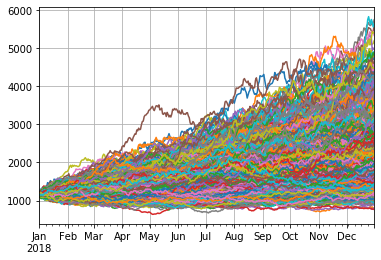

In [36]:
# Graficar
simCloses.plot(grid=True,legend=False)

## 4. Probabilidad Precio-Umbral

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase algún valor umbral en algún momento?

In [37]:
# Umbral
U=closes.iloc[-1]*1.2
dates=pd.date_range('2018-01-01',periods=365)
Umbral=pd.DataFrame(index=dates,columns=['U'],data=U*np.ones(len(dates)))
Umbral

,U
2018-01-01,1403.363965
2018-01-02,1403.363965
2018-01-03,1403.363965
2018-01-04,1403.363965
2018-01-05,1403.363965
2018-01-06,1403.363965
2018-01-07,1403.363965
2018-01-08,1403.363965
2018-01-09,1403.363965
2018-01-10,1403.363965


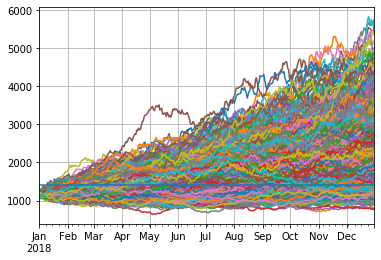

In [38]:
# Concatenación
#pd.concat?
simCloses_U=pd.concat([simCloses,Umbral],axis=1)
simCloses_U.plot(legend=False,grid=True)

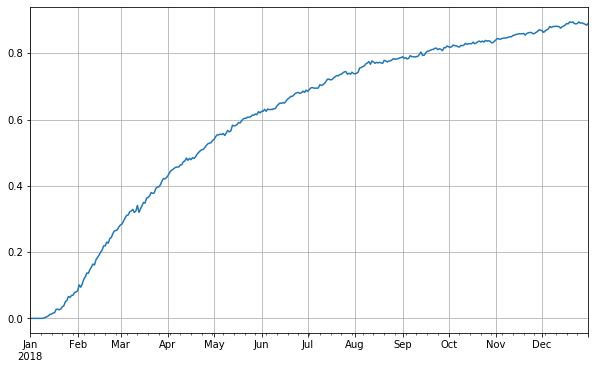

In [39]:
#Comparamos las simulaciones con el umbral
C=simCloses>U
# Calculamos el promedio de C
P=pd.DataFrame(np.mean(C,axis=1))
P.plot(legend=False,grid=True,figsize=(10,6))

___
Entonces, ya aprendimos a bajar datos con pandas-datareader. En específico, a partir de los precios de cierre obtuvimos los rendimientos diarios.

Suponiendo que los rendimientos diarios son un proceso estocástico estacionario de distribución normal, pudimos caracaterizarlo y proyectar varios escenarios de evolución de los precios (montecarlo).

Con estas proyecciones pudimos calcular probabilidades de sobrepasar cierto precio umbral: toma de decisiones.